# Cili Lado Data Analytics and Machine Learning Project - Group 8
Table of Content:

Step 1: Acquire the dataset

Step 2: Import the libraries

Step 3: Import the dataset

Step 4: Feature Selection

Step 5: Clean the data by identifying and handling missing value, redundancy and outliers

Step 6: Encode the categorical data

Step 7: Feature Scaling

Step 8: Splitting dataset into training and testing sets, train the model and measure the accurancy, Random Forest Model

Step 9: RNN Model

The flowchart of our work are shown in the diagram below.

![FlowChart](CiliLadoData/FlowChart.png)

# Objective
Our objective is to find the most important feature that will affect the sales. By analysing the info we have been given, we want to come up with tailor-made plans that use these behavior patterns to improve Cili Lado's business. In this way, it can help us to make better choices and improve our strategies for long-term success in the ever-changing market.

# Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided by Wei Shen where he got it from Mr.Afiq, who is the founder of Cili Lado.

Not all datasets in google drive have been used, only certain datasets that are relevant to our analysis have been used. The selected datasets are the Product Overview from the Product Folder. 

We download all the dataset into our local drive as a zip file .

![DownloadAll](CiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zip file.

![ZippedFile](CiliLadoData/ZippedFile.png)
![DownloadedFile](CiliLadoData/DownloadedFile.png)

The zip file includes the Product Overview datasets which is from May 2023 to October 2023. Each of them has 22 columns but different number of rows. May, June, July, August, September, October has 32, 31, 32, 32, 31, 32 rows respectively. The column names are:

1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all 6 datasets together by copying and pasting them into a new Excel File named MergedFile.xlsx.

![CopiedFile](CiliLadoData/CopiedFile.png)

![PasteFile](CiliLadoData/PasteFile.png)

![MayJune](CiliLadoData/MayJune.png)

To check if the datasets are merged correctly, we calculate the total number of rows from each file, which is 31 + 30 + 31 + 31 + 30 + 31 + 1 = 185. The total is same as our MergedFile, which has 185 rows and this means that the merged file contains all needed data.

However, to fulfill our objective, we require a different set of data sourced from the Dashboard of the year 2023.

![Dashboard2023](CiliLadoData/Dashboard2023.png)

These following columns have been extracted from the Dashboard dataset:

1. Numbers of new buyers
2. Numbers of existing buyers

We decided to complete all these steps in Excel instead of in Python because it is faster. Besides that, we want to make direct changes to our dataset rather than temporary changes only.

Up to now, we have 24 column and 184 rows inside the dataset.

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](CiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](CiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing steps.

We have also converted the date column to ensure Python recognises it in date format, preventing unintentional calculations. This format ensures proper identification as a date type without triggering any unwanted error.

![Date](CiliLadoData/Date.png)

Now the data can be used for the next few steps.


# Step 2: Import the libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Step 3: Import the dataset

We import the datasets from a local directory. We create a folder named CiliLadoData and store all the datasets and images we use in that folder.

In [157]:
df = pd.read_excel('MergedFile.xlsx')

# Use .info() to show the info of the Excel file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   184 non-null    datetime64[ns]
 1   Product Visitors (Visit)               184 non-null    int64         
 2   Product Page Views                     184 non-null    int64         
 3   Items Visited                          184 non-null    int64         
 4   Product Bounce Visitors                184 non-null    int64         
 5   Product Bounce Rate                    184 non-null    float64       
 6   Search Clicks                          184 non-null    int64         
 7   Likes                                  184 non-null    int64         
 8   Product Visitors (Add to Cart)         184 non-null    int64         
 9   Units (Add to Cart)                    184 non-null    int64     

In [158]:
# Use print df to show the dataset
print(df)

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                         1                   1              1  \
1   2023-05-02                         3                   6              1   
2   2023-05-03                         4                   7              1   
3   2023-05-04                         1                   3              1   
4   2023-05-05                         3                  10              1   
..         ...                       ...                 ...            ...   
179 2023-10-27                        74                 180              4   
180 2023-10-28                        53                  86              3   
181 2023-10-29                        78                 133              3   
182 2023-10-30                        88                 144              3   
183 2023-10-31                       122                 282              4   

     Product Bounce Visitors  Product Bounce Rate  

# Step 4: Feature Selection

We have implemented an initial step in our data preprocessing by strategically dropping columns that express the same meaning or highly correlated. This proactive approach helps in simplifying our model by removing redundancies or closely correlated features that might not significantly contribute unique insights to our modeling. Here are all the removed columns:

**Sales (Placed Order) (MYR), Units (Confirmed Order), Buyers (Confirmed Order), Units (Placed Order), Buyers (Placed Order), Units (Add to Cart), Conversion Rate (Confirmed Order), Conversion Rate (Placed Order), Conversion Rate (Add to Cart), Conversion Rate (Placed to Confirmed),Product Bounce Visitors, Items Placed, Items Confirmed, Items Visited, Product Visitors (Add to Cart), Product Bounce Rate**

For the total sales, we only focus on  Sales (Confirmed Order) (MYR). All the columns above have similar meaning or highly related to Sales (Confirmed Order) (MYR). For instance, 'Units(Confirmed Order)' multiplied by 'Buyers (Confirmed Order)' equals to 'Sales (Placed Order) (MYR)'. Moreover, upon excluding cancelled payments, 'Sales (Placed Order) (MYR)' aligns closely with 'Sales (Confirmed Order) (MYR)'. This pattern of correlation extended across various columns labelled with 'Placed Order' or 'Confirmed Order', hence we have removed those related columns as well.

Eliminating irrelevant columns prior to addressing noisy data serves as a proactive measure to prevent the interference of irrevelant columns on important columns.

Here are the column that we retain:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Search Clicks
5. Likes
6. Sales (Confirmed Order) (MYR)
7. Numbers of new buyers
8. Numbers of existing buyers

However, this decision was made based on human logic and assumptions. To ensure a more strict approach, we'll utilize correlation heatmaps to verify and double confirm our choices. This visualization will allow us to gauge the strength and direction of relationships among variables. Identifying patterns where certain factors positively or negatively impact sales will aid in making strategic decisions in subsequent steps.


This is the correlation heat map before removal

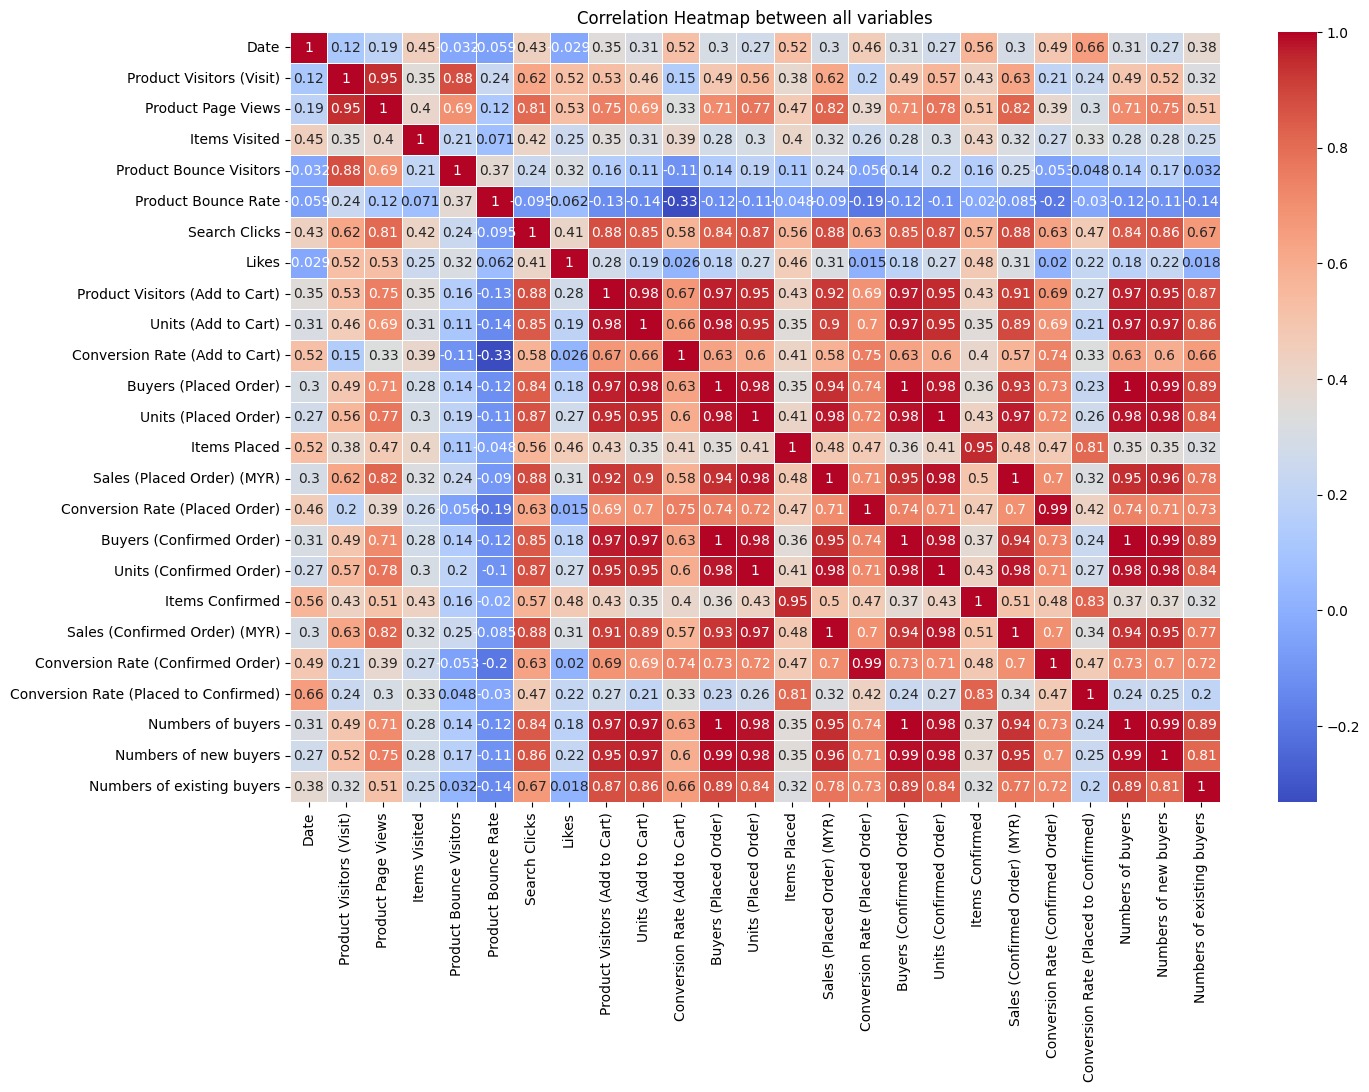

In [159]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Customize the plot (optional)
plt.title('Correlation Heatmap between all variables')
plt.show()

We've implemented a rule to eliminate correlations at 80 percent and above. Following this, the remaining columns are displayed in the heatmap below

Our choice of an 80 percent threshold in correlation removal aligns with common practices in data analysis. Furthermore, examining the graph, columns labeled 'Add to Cart' and 'Placed Order' exhibited correlation coefficients within the range of 80 to 99 percent. We even experimented by lowering the threshold to 0.7 and 0.6, which has the same results. Hence, we determined that 80 percent is a reliable and sufficient threshold.

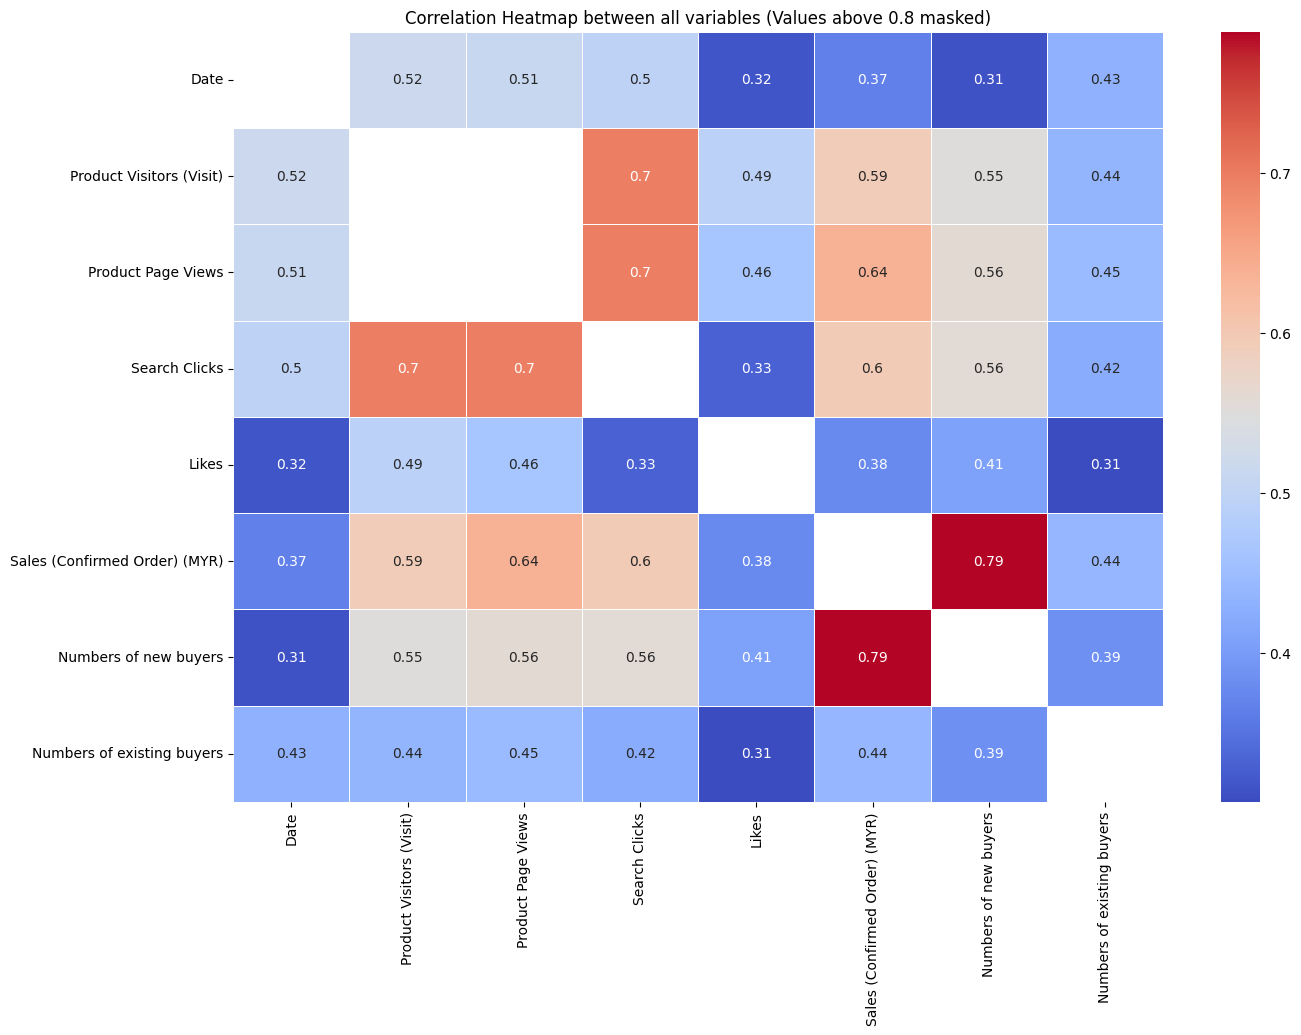

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define the threshold
threshold = 0.8

# Mask values higher than the threshold
mask = abs(correlation_matrix) > threshold
correlation_matrix_masked = correlation_matrix.mask(mask)

# Create a heatmap using seaborn with masked values
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_masked, annot=True, cmap='coolwarm', linewidths=.5)

# Customize the plot (optional)
plt.title('Correlation Heatmap between all variables (Values above 0.8 masked)')
plt.show()


After removal, we discovered that the 8 remaining columns align with our initial manual selections for removal. This two-step approach, starting with human selection followed by machine-driven removal, guarantees that we retain only the columns we intended, avoiding the removal of important data or the addition of irrelevant columns

In [161]:
# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Sales (Placed Order) (MYR)', 'Units (Confirmed Order)', 'Buyers (Confirmed Order)', 'Units (Placed Order)', 'Buyers (Placed Order)', 
                'Units (Add to Cart)', 'Conversion Rate (Confirmed Order)', 'Conversion Rate (Placed Order)', 'Conversion Rate (Add to Cart)', 
                'Conversion Rate (Placed to Confirmed)', 'Product Bounce Visitors', 'Items Placed', 'Items Confirmed', 'Items Visited',  
                 'Product Visitors (Add to Cart)', 'Product Bounce Rate','Numbers of buyers']

df = df.drop(columns=drop_columns)
print(df)

          Date  Product Visitors (Visit)  Product Page Views  Search Clicks   
0   2023-05-01                         1                   1              0  \
1   2023-05-02                         3                   6              1   
2   2023-05-03                         4                   7              3   
3   2023-05-04                         1                   3              1   
4   2023-05-05                         3                  10              2   
..         ...                       ...                 ...            ...   
179 2023-10-27                        74                 180             19   
180 2023-10-28                        53                  86             10   
181 2023-10-29                        78                 133             30   
182 2023-10-30                        88                 144             33   
183 2023-10-31                       122                 282             43   

     Likes  Sales (Confirmed Order) (MYR)  Numbers 

# Step 5: Clean the data by identifying and handling missing value, redundancies and outliers

In [162]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df.isna().sum())

Find missing value of each column using isna()
Date                             0
Product Visitors (Visit)         0
Product Page Views               0
Search Clicks                    0
Likes                            0
Sales (Confirmed Order) (MYR)    0
Numbers of new buyers            0
Numbers of existing buyers       0
dtype: int64


Based on the output from above, we realised that there are **no missing value** in the dataset, so we do not need to use .dropna() to delete or drop any row.

In [163]:
# Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df.duplicated().sum()
duplicate_columns = df.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are **no duplicate data** in this dataset, so there are no redundancy occur in this datasets.

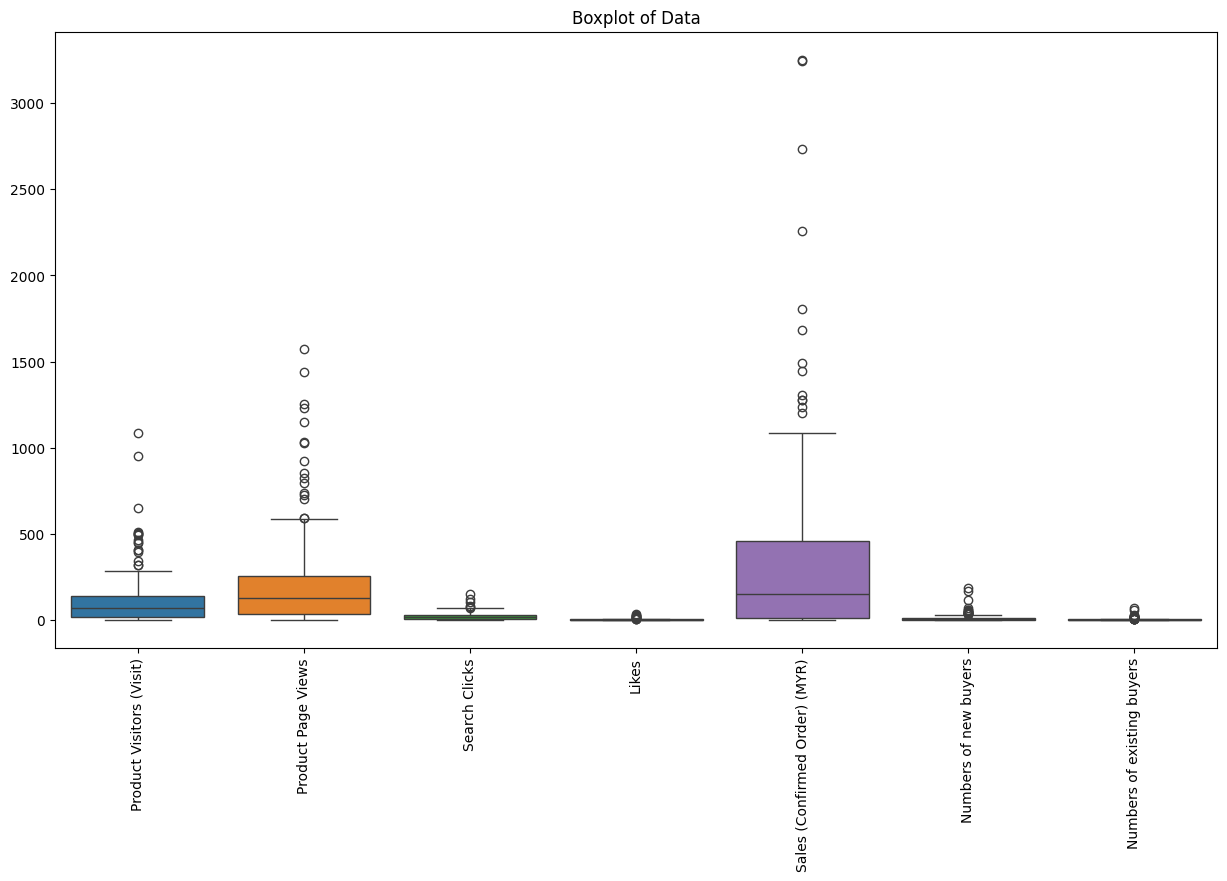

In [164]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf = df.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

The above figure is a boxplot, which is used to identify the outliers in the datasets. The circles that exceeded the horizontal lines which is above the boxplot are outliers.

Before dealing with outliers, we first need to investigate what causes the outliers. This is because there are 2 methods for dealing with outliers, which is **delete** and **imputation**. We found out that the Sales (Confirmed Order) (MYR) has the most outliers. This is the graph for Sales (Confirmed Order) (MYR) and Date.

[datetime.date(2023, 9, 15), datetime.date(2023, 9, 25), datetime.date(2023, 10, 10)]


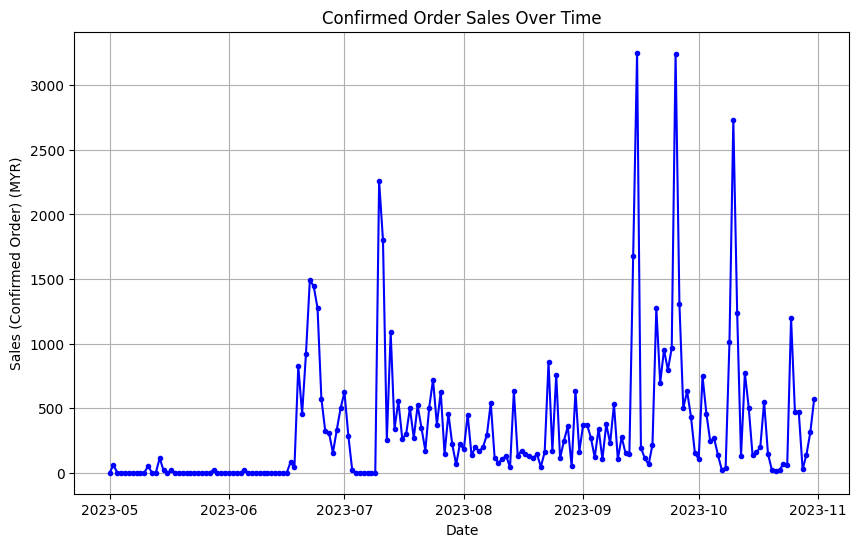

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales (Confirmed Order) (MYR)'], marker='.', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Sales (Confirmed Order) (MYR)')
plt.title('Confirmed Order Sales Over Time')
plt.grid(True)

# Get indices of top 2 highest points
top_2_indices = df['Sales (Confirmed Order) (MYR)'].nlargest(3).index

# Get the dates corresponding to the highest and second highest values
top_2_dates = df['Date'][top_2_indices].dt.date.to_list()

print(top_2_dates)

We found out that the 3 spikes represent the dates with the highest and second-highest sales. After some research, we found out that that these spikes corresponded to the date when Shopee hosted special offers on the 15th and 25th in certain months.

![ShopeeOffer](CiliLadoData/ShopeeOffer.png)

Despite recognising these as potential outliers due to high sales activity, we chose to retain these values to accurately represent the sales trends. This decision allows us to acknowledge significant spikes are related to promotional events, such as the spikes observed on dates like 8th of August(8.8) or 10th of October(10.10).

After careful consideration, we have opted for **imputation** as our preferred method to handle the outliers instead of removing rows. This decision was made after experimenting with rows removal, which resulted in the elimination of 50 rows including the date 9-15 and 9-25. Given that the dataset is already relatively small we decide to make a trade-off between having a more accurate but smaller dataset versus imputing outliers and retaining more data, we have prioritised preserving a larger dataset for analysis. This choice aims to strike a balance between data accuracy and quantity, acknowledging the importance of maximising information while mitigating the impact of outliers on our analysis.


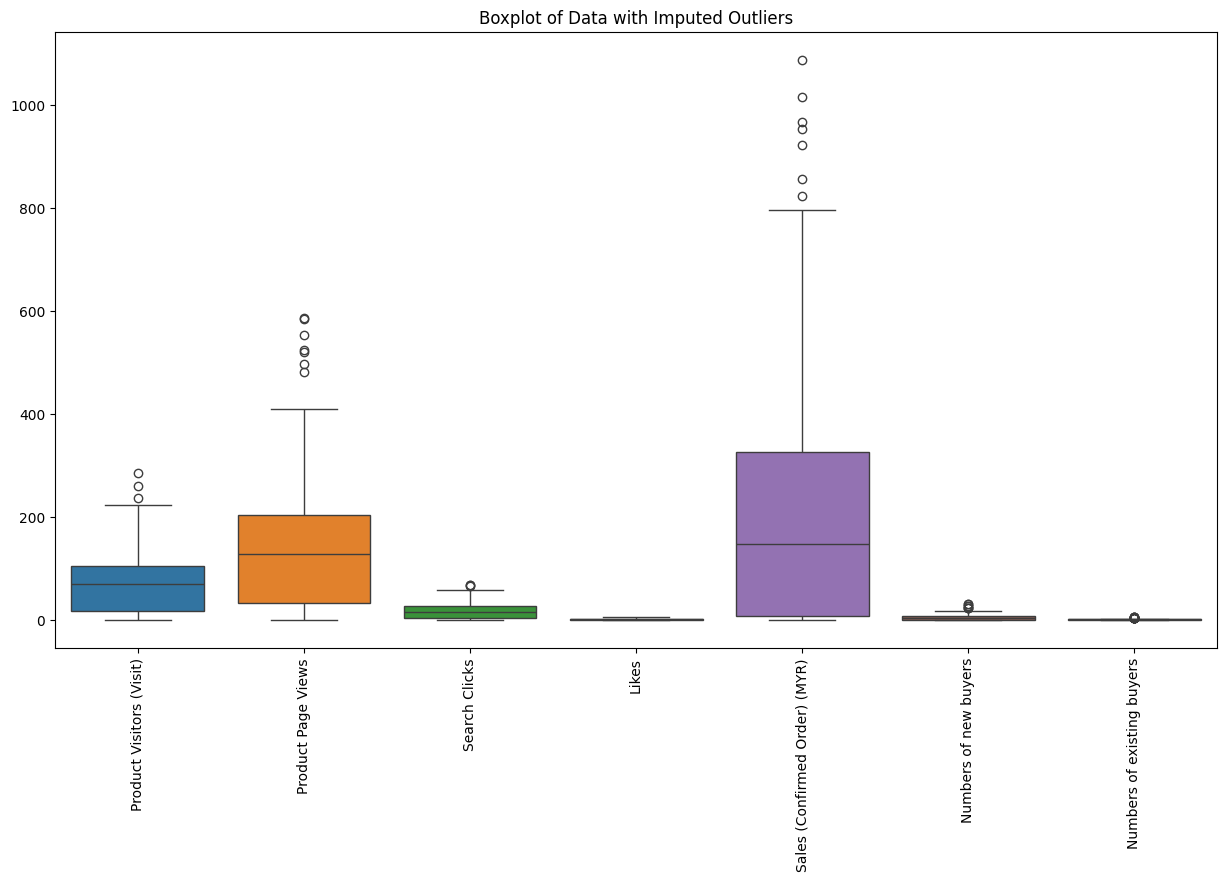

In [166]:
# Assuming 'outliersdf' is your original DataFrame
outliersdf = df.copy()
# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf, q1, q3, iqr):
    for col in outliersdf.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf[col] = np.where((outliersdf[col] < lower_bound) | (outliersdf[col] > upper_bound), median_value, outliersdf[col])
    return outliersdf

# Impute outliers in the DataFrame
df_imputed = impute_outlier_with_median(outliersdf.copy(), Q1, Q3, IQR)

df = df_imputed.copy()

# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed)
plt.title("Boxplot of Data with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()



The above figure is the boxplot of the dataset after detection and imputation of outliers. The number of circles that exceeded the horizontal lines are reduced. Besides that, the height of all boxplot had increased and the scale had decreased, so the range of the column remains the same.

In [167]:
# Now you can display df1 with cleaned data
display(df)
# Assuming 'df_imputed' is your DataFrame after imputing outliers
total_sales = df['Sales (Confirmed Order) (MYR)'].sum()
print("Total Sales:", total_sales)


,Date,Product Visitors (Visit),Product Page Views,Search Clicks,Likes,Sales (Confirmed Order) (MYR),Numbers of new buyers,Numbers of existing buyers
0,2023-05-01,1.0,1.0,0.0,0.0,0.00,0.0,0.0
1,2023-05-02,3.0,6.0,1.0,0.0,58.90,0.0,1.0
2,2023-05-03,4.0,7.0,3.0,0.0,0.00,0.0,0.0
3,2023-05-04,1.0,3.0,1.0,0.0,0.00,0.0,0.0
4,2023-05-05,3.0,10.0,2.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
179,2023-10-27,74.0,180.0,19.0,1.0,469.23,12.0,1.0
180,2023-10-28,53.0,86.0,10.0,1.0,25.80,2.0,0.0
181,2023-10-29,78.0,133.0,30.0,0.0,140.90,4.0,1.0
182,2023-10-30,88.0,144.0,33.0,3.0,313.81,7.0,4.0


Total Sales: 40187.39


Based on the above output, we can observe that the number of rows remains the same since we choose to impute the outliers instead of removing the outliers.

# Step 6: Encode the categorical data
This step is to transform categorical data into numerical data since most of the machine learning model only understand numerical values. However, when dealing with the data in Excel beforehand, we can see that all of the data is numerical except for the Date column.

In [168]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes
print(df.dtypes)

Date                             datetime64[ns]
Product Visitors (Visit)                float64
Product Page Views                      float64
Search Clicks                           float64
Likes                                   float64
Sales (Confirmed Order) (MYR)           float64
Numbers of new buyers                   float64
Numbers of existing buyers              float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 7: Feature Scaling
Normalise and standardise the range of features in the datasets to guarantee that the machine learning model can work and also help to improve the model's training speed and performance.

We chose to use MinMaxScaler over other scaling methods as it ranges from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

However when scaling down now, we cant directly see the real price prediction which will be used in the Multiple Linear Regression Model later, so we need to create a deep copy of d1, because deep copy wont affect d1 even d1 had undergo minmax feature scaling. This df1 will be used later to see the real price

In [169]:
# Extract the date column

date_column = df.iloc[:, 0]
df1 = df.copy(deep=True)  # Creating a deep copy of df as df1

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df.columns[1:])
minmax_frame.insert(0, df.columns[0], date_column)

# Print the datasets after feature scaling
print(minmax_frame)

# Assuming 'df' is your original dataframe before any scaling
df = minmax_frame.copy()


          Date  Product Visitors (Visit)  Product Page Views  Search Clicks   
0   2023-05-01                  0.003521            0.001706       0.000000  \
1   2023-05-02                  0.010563            0.010239       0.014925   
2   2023-05-03                  0.014085            0.011945       0.044776   
3   2023-05-04                  0.003521            0.005119       0.014925   
4   2023-05-05                  0.010563            0.017065       0.029851   
..         ...                       ...                 ...            ...   
179 2023-10-27                  0.260563            0.307167       0.283582   
180 2023-10-28                  0.186620            0.146758       0.149254   
181 2023-10-29                  0.274648            0.226962       0.447761   
182 2023-10-30                  0.309859            0.245734       0.492537   
183 2023-10-31                  0.429577            0.481229       0.641791   

     Likes  Sales (Confirmed Order) (MYR)  Numbers 

# Step 8: Splitting dataset into training and testing sets, train the model and measure the accurancy

We split the datasets into training and testing set. By referring to the Parento theory, the 80% of the datasets are used for trainig while the remaining 20% of the datasets are used for testing.

In the realm of business, where resources such as capital, time and effort are constrained, hence, strategic prioritisation becomes crucial. Therefore, Random Forest Model is used. 

It can capture non-linear relationships that Multiple Linear Regression might overlooked. This could reveal more complex patterns in how customer behaviours interact to influence sales, allowing for better marketing strategies.

Also, it is more robust to outliers than Multiple Linear Regression, possibly providing a more accurate picture of the sales drivers because the data has outliers and is not normally distributed.

With a better understanding of what drives sales because of feature importance, Cili Lado can create more targeted strategies. For instance, if Search Click is a key feature, Cili Lado might work to create more engaging contents to keep customers clicking into its page.

We use a search grid and calculate the best parameters for the random forest. This is better because it does not require manually testing and it is more comprehensive and faster. Here are some of the parameters in random forest.

1. n_estimators: The number of trees in the forest. Generally, more trees increase performance and decrease the risk of overfitting, but also increase computational cost.

2. max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns, however it could also lead to overfitting.

3. min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that only fit a small number of instances.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node. Setting this higher can smooth the model, especially for regression.

5. max_features: The number of features to consider when looking for the best split. Trying different values can affect both performance and overfitting.

However we are aware that the search grid sometimes will not produce consistence result however it is still better than doing it manually.

In [170]:
x_rf = df.drop(columns=['Date','Sales (Confirmed Order) (MYR)'])

y_rf = df['Sales (Confirmed Order) (MYR)']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model_rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_rf, y_train_rf)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best parameters to create a new model
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)

# Train the model
best_rf.fit(x_train_rf, y_train_rf)

# Predict the test set result using the trained model
y_pred_rf = best_rf.predict(x_test_rf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
281 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Below is the Random Forest Model with the best parameter found from the search grid above.

In [171]:
best_rf_model = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Train the model
best_rf_model.fit(x_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(x_test_rf)


Plot the Random Forest Model with the best parameter

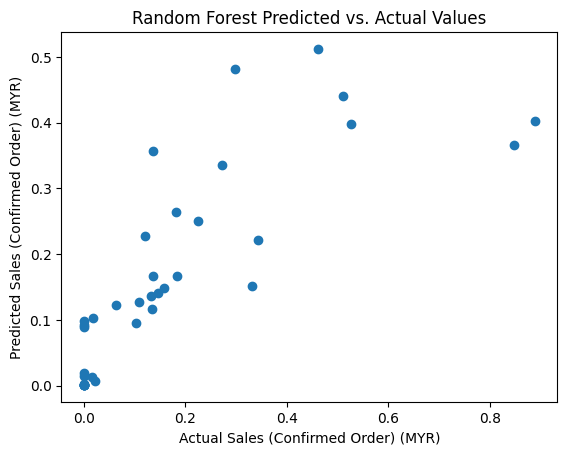

Random Forest Mean Absolute Error (MAE): 0.075577446294192
Random Forest Mean Squared Error (MSE): 0.01852308928242413
Random Forest R-squared (R2): 0.6260583478144309
Random Forest Root Mean Squared Error (RMSE): 0.13609955651075475


In [172]:
# Plotting the predicted vs actual values for Random Forest Model after getting the best parameters
plt.scatter(y_test_rf, y_pred_rf)
plt.xlabel('Actual Sales (Confirmed Order) (MYR)')
plt.ylabel('Predicted Sales (Confirmed Order) (MYR)')
plt.title('Random Forest Predicted vs. Actual Values')
plt.show()

# Calculate and print the performance metrics for Random Forest Model
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")

Also generate the feature importance of each factor.

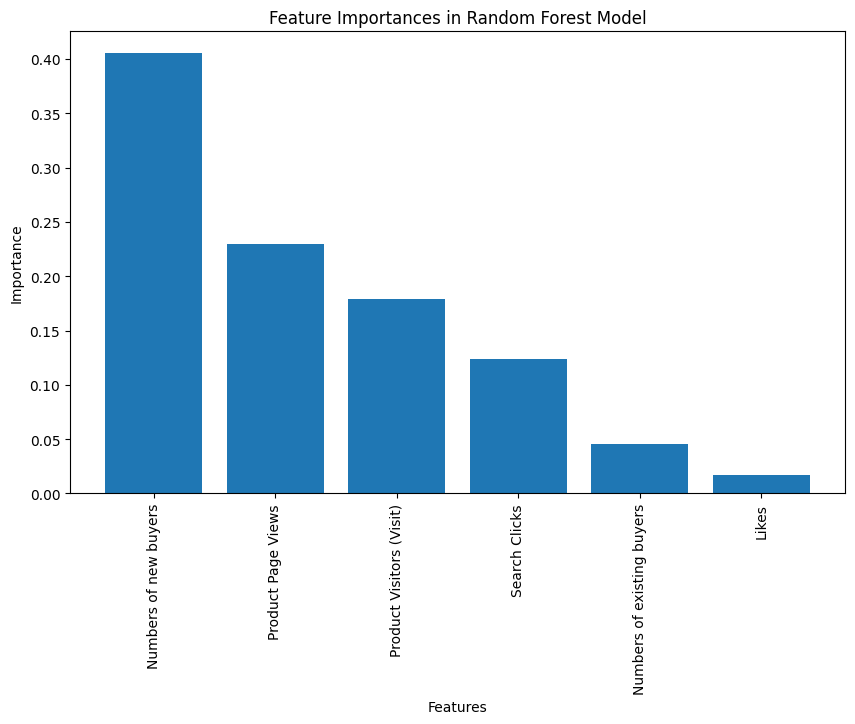

Feature Importances:
                      Feature  Importance
4       Numbers of new buyers    0.405185
1          Product Page Views    0.229466
0    Product Visitors (Visit)    0.179055
2               Search Clicks    0.124170
5  Numbers of existing buyers    0.045479
3                       Likes    0.016646


In [173]:
feature_importances = best_rf_model.feature_importances_
features = x_rf.columns  # Make sure this refers to the correct DataFrame used for training the model
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Plotting Feature Importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=90)
plt.show()

print("Feature Importances:")
print(importance_df)


We found out that Numbers of new buyers, Product Page Views and Product Visitors (Visit) are the top 3 most important features that are related to sales. 

Therefore, according to this graph, Cili Lado should prioritise on focusing the marketing side to increase Numbers of new buyers and Product Page Views, as these two are the most important factors on increasing its sales.

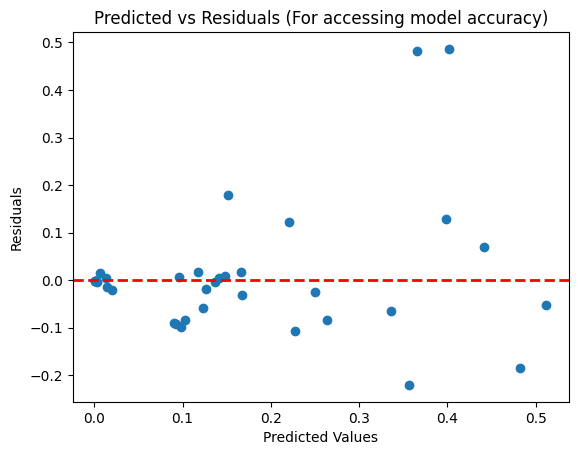

In [174]:
# Plot the graph for residuals

# Calculate residuals
residuals_rf = y_test_rf - y_pred_rf

# Plot residuals against predicted values
plt.scatter(y_pred_rf, residuals_rf)
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

The graph above show the relationship between predicted values and residuals that can help us to assess how well is the trained model predicts outcome. Predicted values are what the model thinks the result should be, while the residuals are the differences between the predictions and the actual values. 

Some of the data points are far from 0.0, indicating the model's predictions are sometimes higher and sometimes lower than the actual values. This variation might influenced by the external variables such as the promotional activity occuring from time to time, changes in customer behaviour, competition dynamics and economic changes that can impact sales unpredictably.

However based on the above residuals plot, we can observe that most of the residuals are concentrated near the line. This means that this residuals plot is equally likely to estimate accurately throughout the entire prediction range. In addition, the vertical distribution in the left side is smaller, indicating higher prediction accuracy for these points.

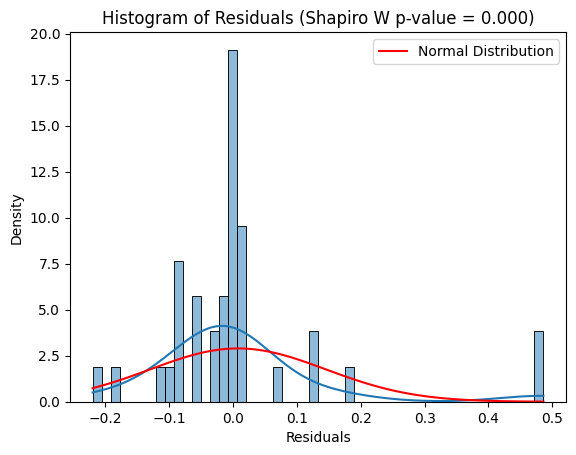

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

# Assuming y_test_rf and y_pred_rf are your test and predicted values
residuals = y_test_rf - y_pred_rf

# Create a density plot of the residuals
sns.histplot(residuals, bins=50, kde=True, stat='density')

# Calculate mean and standard deviation of the residuals for the normal distribution
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Generate points along the x-axis for the normal distribution curve
x = np.linspace(min(residuals), max(residuals), 100)
# Calculate the corresponding probability density function (PDF) values for a normal distribution
pdf = norm.pdf(x, residuals_mean, residuals_std)

# Plot the normal distribution curve
plt.plot(x, pdf, label='Normal Distribution', color='red')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(residuals)[1]))
plt.legend()
plt.show()


The Shapiro-Wilk test is used to assess whether the sample data fits a normal distribution. The histogram of residuals above have a p-value of **0.000** suggests that the residuals are not normally distributed. 

Visual analysis further supports this conclusion. Upon comparing the histogram (blue bars) we can see that the residuals distribution compated to the normal distribution curve (red line) has several differences. The histogram displays left skewness, implying asymmetry, and has an extreme outliers on to the far right. This is notable in the graph where the rightmost point on the residual plot is the same as the highest point in the residual graph above. These observations collectively lead to the conclusion that the residuals are non-normally distributed.

# Step 9: Multiple Linear Regression

After finding the most important feature. Multiple Linear Regression is used to find out the magnitude of impact on sales on the top 3 most important factor. 

We opted for Multiple Linear Regression (MLR) as it aligns with our business objectives. Utilizing a combination of both simple and complex models offers distinct advantages. A simpler model tends to convey clearer interpretations, aiding business owners in better understanding. Its straightforward nature enables deeper insights and a more tangible understanding compared to complex models. In the end, this method gives us a better understanding, helping us make smarter decisions that fit our business needs perfectly.

In [176]:
# Assuming df is your dataset
import statsmodels.api as sm
x_mlr = df[['Numbers of new buyers', 'Product Page Views', 'Product Visitors (Visit)']]
y_mlr = df['Sales (Confirmed Order) (MYR)']

# Splitting the data into training and testing sets (80% train, 20% test)
x_train_mlr, x_test_mlr, y_train_mlr, y_test_mlr = train_test_split(x_mlr, y_mlr, test_size=0.2, random_state=42)

# Adding a constant for the intercept term in MLR
x_train_mlr = sm.add_constant(x_train_mlr)
x_test_mlr = sm.add_constant(x_test_mlr)

# Fit the MLR model on the training data
model_mlr = sm.OLS(y_train_mlr, x_train_mlr).fit()

# Get the summary of the MLR model
model_mlr_summary = model_mlr.summary()
print(model_mlr_summary)

# Optional: Predict and evaluate the model on the test data
y_pred_mlr = model_mlr.predict(x_test_mlr)

                                  OLS Regression Results                                 
Dep. Variable:     Sales (Confirmed Order) (MYR)   R-squared:                       0.685
Model:                                       OLS   Adj. R-squared:                  0.678
Method:                            Least Squares   F-statistic:                     103.5
Date:                           Mon, 20 Nov 2023   Prob (F-statistic):           1.15e-35
Time:                                   15:01:34   Log-Likelihood:                 92.994
No. Observations:                            147   AIC:                            -178.0
Df Residuals:                                143   BIC:                            -166.0
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

The table above shows the summary of the MLR. We only focus on the coefficient part as it hold important insights. This is the part which gives the most insights. However, after scaling the features, interpreting the numbers becomes less straightforward. For instance, a coefficient of 0.6377 signifies that each additional unit in the number of new buyers corresponds to a sales increase of 0.6377. To gain a clearer understanding, let's review the summary without feature scaling. This step will provide a more relatable perspective on the impact of each factor on sales.

In [177]:
# Assuming df is your dataset
import statsmodels.api as sm
x_omlr = df1[['Numbers of new buyers', 'Product Page Views', 'Product Visitors (Visit)']]
y_omlr = df1['Sales (Confirmed Order) (MYR)']

# Splitting the data into training and testing sets (80% train, 20% test)
x_train_omlr, x_test_omlr, y_train_omlr, y_test_omlr = train_test_split(x_omlr, y_omlr, test_size=0.2, random_state=42)

# Adding a constant for the intercept term in MLR
x_train_omlr = sm.add_constant(x_train_omlr)
x_test_omlr = sm.add_constant(x_test_omlr)

# Fit the MLR model on the training data
model_omlr = sm.OLS(y_train_omlr, x_train_omlr).fit()

# Get the summary of the MLR model
model_mlr_osummary = model_omlr.summary()
print(model_mlr_osummary)

# Optional: Predict and evaluate the model on the test data
y_pred_omlr = model_omlr.predict(x_test_omlr)

                                  OLS Regression Results                                 
Dep. Variable:     Sales (Confirmed Order) (MYR)   R-squared:                       0.685
Model:                                       OLS   Adj. R-squared:                  0.678
Method:                            Least Squares   F-statistic:                     103.5
Date:                           Mon, 20 Nov 2023   Prob (F-statistic):           1.15e-35
Time:                                   15:01:34   Log-Likelihood:                -934.68
No. Observations:                            147   AIC:                             1877.
Df Residuals:                                143   BIC:                             1889.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

1. Coefficient for 'Numbers of New Buyers' (23.0999):

Interpretation: This coefficient implies that with each additional new buyer, the Sales (Confirmed Order) (MYR) increases by 23.0999. This positive coefficient underscores a robust and notable relationship between the number of new buyers and the sales outcome. Remarkably, considering the absence of the original price of a single unit of Cili Lado Sambal provided to the model, the prediction deviates by merely RM 5. 

This closeness suggests the model's potential accuracy in generating insightful predictions. However now lets consider standard error also, by using the formula 

Confidence interval=Coefficient estimate ± Margin of error, where margin of error = Critical value×Standard error. 

For a 95% confidence level which we assumed, the critical value is approximately 1.96. 

Calculate the margin of error:
Margin of error=1.96×2=3.92

Determine the confidence interval:
Confidence interval=23.0999±3.92

This results in a confidence interval of approximately [19.1799, 27.0199]. The 95% confidence level that the value fall within in range. 

So the accurancy is (1 - 5/18)*100% = 72.22% accurate. The difference of about RM 5 suggests that the model is capturing the key relationship quite well, though there is a slight overestimation. This has the possiblity that some new buyers may purchase more than one item and there are other factors influencing the total sales like discounts in Shopee.

2. Coefficient for 'Product Page Views' (0.7705):

Interpretation: The coefficient of 0.7705 implies that for each additional product page view, the Sales (Confirmed Order) (MYR) increases by 0.7705 units. This positive coefficient signifies a positive relationship between product page views and sales, indicating that an increase in product page views is associated with a rise in sales. While the effect is positive, it's also smaller compared to the impact of the 'Numbers of New Buyers' coefficient.

However we can calculate that 18/0.7705 = 23.36 suggests that, on average, every 23.36 product page views may lead to a buyer's appearance. However, it's important to note that this estimation is based on the coefficient's magnitude and the relationship it represents in the model. It provides a way to interpret the impact of product page views on potential buyer appearances, according to the model's results.

3. Coefficient for 'Product Visitors (Visit)' (-0.3615):

Interpretation: This coefficient indicates that for each additional product visitor, sales decrease by 0.3615 unit. However, given the high p-value (0.382) associated with this coefficient, the relationship between product visitors and the dependent variable which is Sales (Confirmed Order) is not statistically significant in this model. This means that the effect of product visitors on the Sales is uncertain and may not be reliable for predictions or inferences. Considering logical reasoning, it's rational to assume that an increase in Product Visitors (Visit) does not necessarily lead to a decrease in sales.

Here the predicted and actual value is plotted

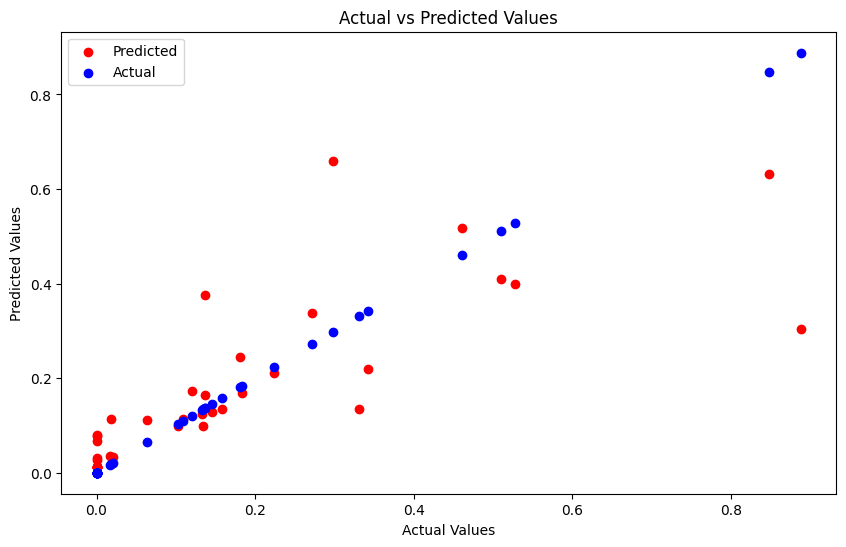

RNN Mean Absolute Error (MAE): 0.07776338561522347
RNN Mean Squared Error (MSE): 0.019041299133222066
RNN R-squared (R2): 0.6155967965671405
RNN Root Mean Squared Error (RMSE): 0.13799021390382024


In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mlr, y_pred_mlr, color='red', label='Predicted')
plt.scatter(y_test_mlr, y_test_mlr, color='blue', label='Actual')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

mae_mlr = mean_absolute_error(y_test_mlr, y_pred_mlr)
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

# Print metrics
print(f"RNN Mean Absolute Error (MAE): {mae_mlr}")
print(f"RNN Mean Squared Error (MSE): {mse_mlr}")
print(f"RNN R-squared (R2): {r2_mlr}")
print(f"RNN Root Mean Squared Error (RMSE): {rmse_mlr}")

The blue points represent the actual values of the dependent variable (sales confirmed orders) from your test data.
The red points indicate the predicted values from the MLR model.
Ideally, in a perfect prediction scenario, all points (both blue and red) would align along a straight line, indicating that the predictions perfectly match the actual values. The closeness of the red points to the blue ones gives an indication of the model's accuracy.

While the overall visual representation suggests a strong alignment between predicted and actual values, some points situated further towards the bottom left deviate slightly. This divergence might indicate specific instances where the model's predictions were not as accurate because it has promotion or offer on that day on Shopee which the model did not predicted it. Despite these outliers, the majority of the points exhibit a close alignment, affirming the model's overall reliability.

The R-squared value of 0.6156 reveals that approximately 61.56% of the total variability in sales can be explained by the variation in the Numbers of new buyers, Product Page View and Product Visitors (Visit) . This implies that while the presence of these 3 factor is important, 38.44% of the variability is influenced by other factors not considered in our model.

The Mean Absolute Error (MAE: 0.0778), Mean Squared Error (MSE: 0.0190), and Root Mean Squared Error (RMSE: 0.1378) are all relatively low, suggesting reasonable predictive accuracy.

Here are the metric obtained from the Random Forest
Random Forest Mean Absolute Error (MAE): 0.075577446294192

Random Forest Mean Squared Error (MSE): 0.01852308928242413

Random Forest R-squared (R2): 0.6260583478144309

Random Forest Root Mean Squared Error (RMSE): 0.13609955651075475

his indicates the dataset might be more suitable for the Random Forest model. Despite this, the small metrics difference between the two models suggests that both Multiple Linear Regression (MLR) and Random Forest are suitable and they both offer different reliable insights, each providing distinct perspectives on the data.

In [179]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the dataframe with all the features including 'Numbers of new buyers', 'Product Page Views',
# 'Product Visitors (Visit)', and 'Sales (Confirmed Order) (MYR)'

# Feature Selection and Data Preparation
top_features = ['Numbers of new buyers', 'Product Page Views']
selected_features = df1[top_features]
target_variable = df1['Sales (Confirmed Order) (MYR)']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Initialize XGBoost regressor and train the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Increase the top features by 5% in the test set
increased_features = X_test * 1.0   # Assuming scaling is not needed for this specific case
increased_features2= X_test * 1.05
# Predict sales growth using the XGBoost model
predicted_sales_growth = xgb_model.predict(increased_features)
predicted_sales_growth2 = xgb_model.predict(increased_features2)

total_sales_growth = sum(predicted_sales_growth)
total_sales_growth2 = sum(predicted_sales_growth2)
print (total_sales_growth)
print (total_sales_growth2)

5750.684433765709
5278.684653706849


# Step 11: Summary
For Part A, the important findings are listed below:

1. Optimize the Shopee Experience: Elevate the platform's design interface and experience on Shopee to attract customers, directly influencing sales. Conduct testing across various layouts, designs, and call-to-action placements to foster increased page views and visits, thereby enhancing the overall Shopee shopping experience. 

2. Search Optimization: Given the significance of search clicks as a featured importance, it becomes crucial to optimize the search functionality. To stand out among competitors, consider implementing standout graphics or design to prompt users to click on Cili Lado. By combining functionality with eye-catching aesthetics, the aim is to not just meet but exceed user expectations, by increasing clicks and heightened user satisfaction.

For Part B, the important findings are as follows:

1. Loyalty Programs: If repeat customers significantly contribute to sales, developing a loyalty program or subscription model could enhance customer retention rates. Also, improve the flavour or increase more flavour which make the repeat customer come back for more.

2. Targeted Marketing: Create different marketing campaigns for new and existing customers. Survey can be taken to analyse the age or customer peference for better improvement on marketing strategies.

The following are the key findings for all combined model:

1. Holistic Marketing Strategy: This combined model can identify which factors have the most significant impact on sales. Focus on the part then move on to the next most important feature. By knowing the combined effect, Cili Lado can prioritize which aspects of the customer experience need improvement to boost sales.

2. Product Development and Inventory Management: By understanding the full customer journey from initial visit to repeat purchase, you can make informed decisions about product development and inventory management to ensure that Cili Lado is meeting customer demand.

3. Resource Allocation: For certain features, like product visitors and search click, have a stronger relationship with sales, Cili Lado can allocate more resources to improve these areas. For instance, create higher quality marketing video or graphics to attract customer.


However, all the methods above are the most direct methods to increase page views. But, it has other indirect methods to increase page views. We had find a large amount of research and done some interviewing with our finance and bussiness students in Taylor's University. Here are some of the methods:

1. Competitor Analysis: When searching for sambal in Shopee. Cili Lado is also one of the 8 options showed. A thorough examination of successful competitors reveals some key factors. We found out that they had multiple flavours or options to buy. If there are only 2 choices, the choices are Spicy and Less Spicy only. It is recommended for Cili Lado to enhance its product offerings by introducing a variety of flavors. Specifically, shifting from the current categorization of "Red and Green" to a more consumer-friendly "Spicy and Less Spicy" classification could significantly improve user understanding. The success of the sambal with 2.2 million sales is because of its influential presence on TikTok. This highlights the statement that relying solely on Shopee may not be potent enough for achieving such remarkable sales figures.

2. Exposure: Broadening the brand's presence across diverse platforms, such as XiaoHongShu, Facebook, and Instagram, serves as a strategic move. Simultaneously, tapping into offline avenues, like participating in Food Fairs or Road Shows, presents an opportunity to engage with potential customers directly. This comprehensive strategy aims to achieve two primary objectives: First, increasing brand awareness among a wider audience, and second, attracting new customers through offline events. By creating an online and offline presence, Cili Lado can be established as a strong brand identity. The ultimate goal is to channel this heightened visibility into increased sales on platforms like Shopee. This interconnected approach ensures that the brand resonates with a broader demographic, drawing attention to Cili Lado and ultimately driving a surge in online sales through strategic exposure efforts. 

3. Add value and identity: Add the message that Cili Lado are handcrafted and created with care. This can be emphasized through marketing messages, labeling, or packaging, reinforcing the idea that Cili Lado is not solely just a food but a healthy culinary experience crafted with dedication and attention to detail. Incorporating these enhancements not only adds value to the product itself but also contributes to building a strong brand identity, fostering customer loyalty and attracting new patrons seeking unique and quality offerings. For instance, highlighting the vegan nature of the sambal in the Shopee description can be extended as an invitation for vegetarians to savor the unique flavors of Cili Lado.

I know you spice things up, waht about the chili, blog, influencer
4 year ago, law student MMU end up doing business homemade sambal minang homemade sumatera, sister in law, recipe authentic, testing very good want to do business, start behind kitchen in house, slowly open small factory in melaka, pandemic, 2020 first gen product label  sencod 2021 recent 2022 small factory 2023 studio sell product shope live whats face insta onpay tiktok laz sho, 186 in shopee 3 years, reveal then viral, link to shopee, 100 bottle comapre to 3 year 186 , one step further facebook, apointed ambasador, june 3 months ago until now 2k bottle, spread of the product, sambal not too spicy lots of flavour, lime, limau kasturi, when you eat you cant stop want to eat more, perfect recepi of sambal, shopee from sabah to kelantan, 13 individual spreading the flavour , conculsion power of passion, colab and invoation. while keeping things light and fun. this is a story of how a tradisional recipe with dedication can capture the hearts and taste bud of malaysian across the country.

 onpay selling offline direct to custoemr, not friendly on shopee lazada tiktok, facebook wahts instagram have database testimoni engament followers shopee keep the privacy info, no age gender locality and peak time sale more on night during 8 - 12 on its own analysis, we didnt know by day month year only know total we need to enchan more the data given by shopee tiktok not very good veggie friendly ,red is more spicier than green, nervous and sweating, make it more fun, we are quite inspired, 90 precent sales in shopee, shopee civer 90 percent discont, price today is rm4.20 in live that day is 9.25 again proof. 
 
 first is data collection advice him on how to improve, marketing strat, propose any other platform, focus on more how we do the caimpagine, marketing campaign, what is the aim we want target both but we want our customer to become regular customer and consistent, aim to engage with them, priro is to boost our sales and maintain customer like regular customer, age of our customer, when we know the age can do a more targeted campaign based on age. if majority campain is youngsets do a more targeted campaign on the youngeserts more influence to them, we can give them a survey to get info and age. 30 to 50 age. mostly shopee no lazada  from cili man facebook then to shopee we offer form tiktok and lazada but didnt get much attraction we can help promote someone promoting in shopee affored 4 to 5 now is getting down to 1.8 to 2 but didnt know who did it or who promoting it, know the name but cant communicate with them. 2.2 is malay sambal they put sugar taste good nice but have sugar, diet guy you will opt for sambal taht doesnt have sugar, level of spiness he is very spicy, itchy on head, it doesnt reach lvl for ours a bit is red, help to get data and how to use it to engage with marketing and adv 